<a href="https://colab.research.google.com/github/DeuklyoungKo/TensorFlowBasicWithPython/blob/main/TensorflowWithMyImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -q https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/notMNIST_small.tar.gz
!tar -xzf notMNIST_small.tar.gz

In [9]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [18]:
#파일 경로 가져오기
paths = glob.glob('./notMNIST_small/*/*.png')
#파일 경로 섞기
paths = np.random.permutation(paths)

#이미지파일들 가져오기
x_train = np.array([plt.imread(paths[i]) for i in range(len(paths))])
#폴더명에서 결과 값을 추출
y_train = np.array([paths[i].split('/')[2] for i in range(len(paths))])
print(x_train)
print(y_train)
print(x_train.shape, y_train.shape)

[[[1.         1.         1.         ... 0.3647059  0.02745098 0.        ]
  [1.         1.         1.         ... 1.         0.74509805 0.06666667]
  [1.         1.         1.         ... 0.99215686 1.         0.6039216 ]
  ...
  [1.         1.         1.         ... 0.99215686 1.         0.7490196 ]
  [1.         1.         1.         ... 1.         0.92156863 0.2       ]
  [1.         1.         1.         ... 0.49803922 0.12941177 0.        ]]

 [[0.         0.         0.         ... 0.9764706  0.92156863 0.63529414]
  [0.         0.         0.         ... 0.9882353  1.         0.46666667]
  [0.         0.         0.         ... 0.99607843 0.32941177 0.        ]
  ...
  [0.07058824 0.7058824  1.         ... 0.         0.         0.        ]
  [0.8666667  1.         0.99607843 ... 0.         0.         0.        ]
  [0.38039216 0.7490196  0.92941177 ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.23921569 0.04313726 0.        ]
  [0.         0.      

In [19]:
y_train[0:10]

array(['D', 'I', 'G', 'A', 'I', 'A', 'E', 'D', 'E', 'F'], dtype='<U1')

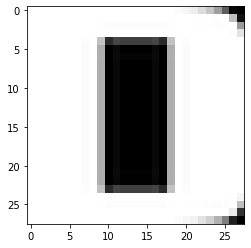

In [20]:
plt.imshow(x_train[0], cmap='gray')

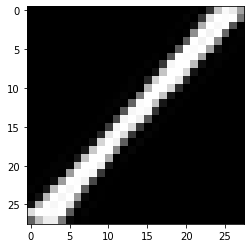

In [21]:
plt.imshow(x_train[1], cmap='gray')

In [10]:
x_train = x_train.reshape(18724,28,28,1)
y_train = pd.get_dummies(y_train)
print(x_train.shape, y_train.shape)

(18724, 28, 28, 1) (18724, 10)


In [11]:
# 모델 만들기
X = tf.keras.layers.Input(shape=[28,28,1])
# convolution 이미지 필터 레이어추가
H = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='swish')(X)
# 절반으로 레이어 필터 사이즈를 줄임
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)

H = tf.keras.layers.Dense(120, activation="swish")(H)
H = tf.keras.layers.Dense(84, activation="swish")(H)
Y = tf.keras.layers.Dense(10, activation="softmax")(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [12]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
586/586 [==============================] - 11s 17ms/step - loss: 0.4488 - accuracy: 0.8690
Epoch 2/10
586/586 [==============================] - 10s 17ms/step - loss: 0.2448 - accuracy: 0.9267
Epoch 3/10
586/586 [==============================] - 10s 17ms/step - loss: 0.1829 - accuracy: 0.9423
Epoch 4/10
586/586 [==============================] - 11s 19ms/step - loss: 0.1394 - accuracy: 0.9564
Epoch 5/10
586/586 [==============================] - 10s 17ms/step - loss: 0.1056 - accuracy: 0.9676
Epoch 6/10
586/586 [==============================] - 10s 17ms/step - loss: 0.0771 - accuracy: 0.9756
Epoch 7/10
586/586 [==============================] - 10s 18ms/step - loss: 0.0575 - accuracy: 0.9813
Epoch 8/10
586/586 [==============================] - 10s 18ms/step - loss: 0.0452 - accuracy: 0.9860
Epoch 9/10
586/586 [==============================] - 10s 18ms/step - loss: 0.0356 - accuracy: 0.9888
Epoch 10/10
586/586 [==============================] - 10s 18ms/step - loss: 0.029

In [13]:
# 모델을 이용
pred = model.predict(x_train[0:5])
pd.DataFrame(pred).round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
y_train[0:5]

,A,B,C,D,E,F,G,H,I,J
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
